# Tutorial 6: Importing custom beam patterns.
In this tutorial, we will demonstrate how to import and use custom beam patterns. This feature was developed for simulating the propagation of measured beam patterns, but can in principle import any beam pattern in .txt format.
We shall demonstrate the custom beam pattern functionality using the same simulation as in tutorial 4: backward propagation.

In [1]:
%matplotlib notebook

import numpy as np

from src.PyPO.System import System

s = System()
s.setCustomBeamPath("tutorial", append=True)

2023-05-02 16:58:25 - WARNING - System override set to True. 


In addition to the usual import and declaration of the System, we also call the setCustomBeamPath method. This method sets the path to the custom beam. In this case, we set it to 'tutorial'. This is the folder under the 'PyPO/custom/beam' (which is the default path) file tree. By also specifying 'append=True', we append the tutorial folder to the original path. The custom beam should be saved in the following format: the real part as r<name_of_beam>.txt, imaginary part as i<name_of_beam>.txt. In this case, our custom beam is named 'PyPO' and is generated by converting a .png containing the word 'PyPO' to a numpy array, representing the intensity pattern. The imaginary part is set to zero.

2023-05-02 16:58:25 - INFO - Added plane source to system. 
2023-05-02 16:58:25 - INFO - Added plane plane_up to system. 
2023-05-02 16:58:25 - INFO - Added plane plane_down to system. 
2023-05-02 16:58:25 - INFO - Translated element plane_up by ('0.000e+00', '0.000e+00', '1.000e+02') millimeters. 


<IPython.core.display.Javascript object>


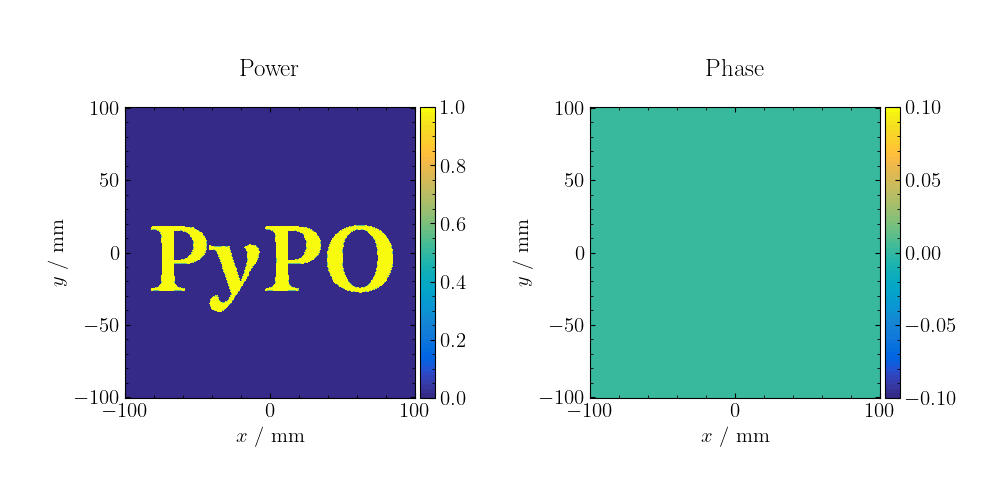

In [2]:
source = {
        "name"      : "source",
        "gmode"     : "xy",
        "lims_x"    : np.array([-100, 100]),
        "lims_y"    : np.array([-100, 100]),
        "gridsize"  : np.array([301, 301])
        }

plane_up = {
        "name"      : "plane_up",
        "gmode"     : "xy",
        "lims_x"    : np.array([-200, 200]),
        "lims_y"    : np.array([-200, 200]),
        "gridsize"  : np.array([501, 501]),
        "flip"      : True
        }

plane_down = {
        "name"      : "plane_down",
        "gmode"     : "xy",
        "lims_x"    : np.array([-100, 100]),
        "lims_y"    : np.array([-100, 100]),
        "gridsize"  : np.array([301, 301])
        }

s.addPlane(source)

s.addPlane(plane_up)
s.addPlane(plane_down)

s.readCustomBeam("PyPO", "source", "Ex", lam=1)

s.translateGrids("plane_up", np.array([0, 0, 100]))

s.plotBeam2D("PyPO", "Ex", mode="linear")

We read the custom beam by calling the readCustomBeam method. We pass the name of the beam as first argument. The second argument is the surface on which the custom beam should be defined. It is important that the gridsize of the surface equals the gridsize of the beam pattern. The third argument is the component, which we set to 'Ex', the x-component of the electric field. Lastly, we pass the wavelength of the custom beam which we set at 1 mm.

In [ ]:
runPODict = {
        "t_name"    : "plane_up",
        "s_current" : "PyPO",
        "epsilon"   : 10,
        "exp"       : "fwd",
        "mode"      : "JMEH",
        "name_JM"   : "JM_up",
        "name_EH"   : "EH_up"
        }

runPODict_bwd = {
        "t_name"    : "plane_down",
        "s_current" : "JM_up",
        "epsilon"   : 10,
        "exp"       : "bwd",
        "mode"      : "JMEH",
        "name_JM"   : "JM_down",
        "name_EH"   : "EH_down"
        }

s.runPO(runPODict)

s.runPO(runPODict_bwd)
s.plotBeam2D("EH_up", "Ex", vmin=-30)
s.plotBeam2D("EH_down", "Ex", vmin=-30)

2023-05-02 16:58:27 - INFO - *** Starting PO propagation *** 
2023-05-02 16:58:27 - INFO - Propagating PyPO on source to plane_up, propagation mode: JMEH. 
2023-05-02 16:58:27 - INFO - Hardware: running 256 CUDA threads per block. 
2023-05-02 16:58:27 - INFO - ... Calculating ... 
